# Principal Component Analysis - Mysterious Data

You have been given a strange and mysterious dataset. This dataset is
a collection of thousands of points in dimension $d$ = 1000. If you are like me, then it is hard to
visualize this data in 1000 dimensions. Can you find interesting patterns in the data by looking at
lower-dimensional visualizations? Investigate the structure of this dataset using PCA/plots/etc,
and find out what information this dataset contains.

The text file `mysterious_data.txt` contains the data matrix

You are not allowed to use any built-in PCA functions: you have to do all
that data-processing by yourself. Of
course, for computing eigenvalues/eigenvectors you may use the numpy library.

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data matrix
A = np.loadtxt('mysterious_data.txt')
n,d = A.shape
print(f'The matrix A contains {n} points in dimension {d}')

The matrix A contains 3000 points in dimension 1000


Each row of $A$ corresponds to a datapoint.

### 1. Center the data 

In [6]:
mu = A.mean(axis = 0)
mu.shape

(1000,)

In [7]:
mat_mu = np.vstack([mu] * A.shape[0])
A_centered = A - mat_mu

### 2. Covariance matrix

In [8]:
cov_mat = A_centered.T @ A_centered
cov_mat.shape

(1000, 1000)

### 3. Eigen decomposition

In [9]:
w, v = np.linalg.eigh(cov_mat)

### 4. Keep k largest

In [10]:
# k = 1
lambda_1 = w[-1]
b_1 = v[:,-1]

coord_1d = A_centered @ b_1

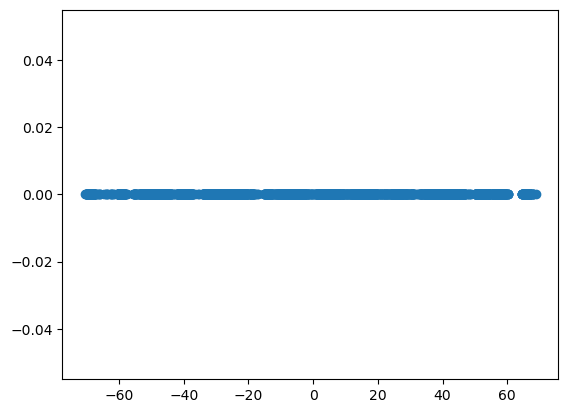

In [11]:
# 1D visualization
plt.scatter(coord_1d, np.zeros(len(coord_1d)));

In [12]:
# k = 2
lambda_2 = w[-2]
b_2 = v[:,[-1,-2]]

coord_2d = A_centered @ b_2

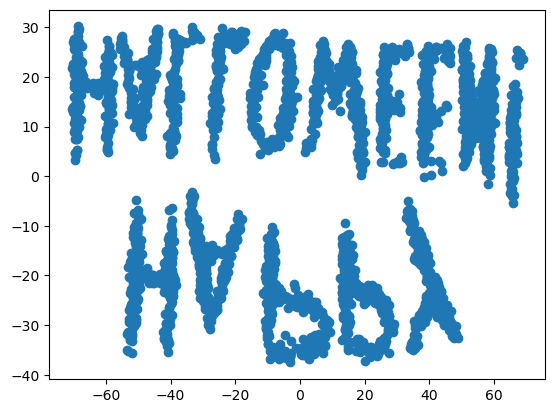

In [13]:
# 2D visualization
plt.scatter(coord_2d[:,0], coord_2d[:,1]);

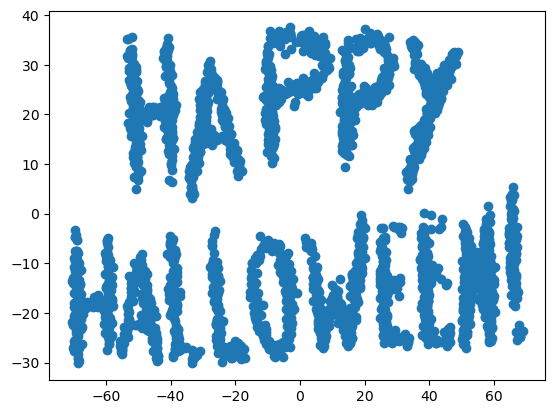

In [14]:
# adjust the plots to see the information
plt.scatter(coord_2d[:,0], -coord_2d[:,1]);

The information contained  in the dataset is : "HAPPY HALLOWEEN!"

### 5. Checking with Scikit-Learn's PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
n = 2
pca = PCA(n_components=n)
pca.fit(A)

PCA(n_components=2)

(3000, 2)


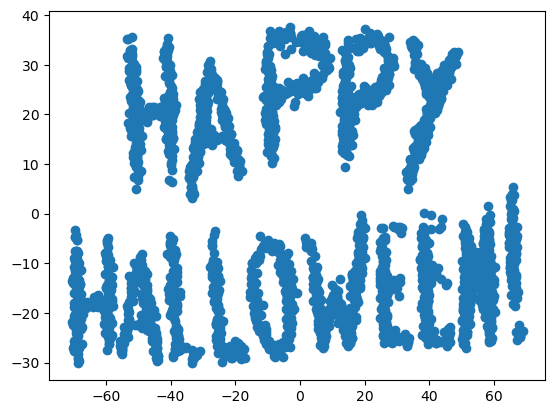

In [17]:
x = pca.transform(A)
print(x.shape)
plt.plot(-x[:,0], x[:,1], 'o');